In [1]:
%load_ext autotime
import warnings; warnings.filterwarnings('ignore')

In [2]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, networkx as nx
from scipy.cluster.hierarchy import dendrogram, fcluster
from utils import jaccard_coefficient

time: 726 ms


In [3]:
class GirvanNewman():
    def __init__(self, G):
        self.G = G

    def highest_edge_betweenness(self):
        betw = nx.edge_betweenness_centrality(self.G).items()
        betw.sort(key=lambda x: x[1], reverse=True)
        return betw[0][0]
    
    def split(self):
        c = list(nx.connected_component_subgraphs(self.G))
        while len(c)==1:
            highest = self.highest_edge_betweenness()[0]
            self.G.remove_edge(highest)
            c = list(nx.connected_component_subgraphs(self.G))
        return c 
    
    def plot(self, ax=None):
        if not ax:
            fig, ax = plt.subplots(1,1, figsize=(6,6))
        nx.draw_networkx(self.G, ax=ax)
        ax.axis('off')
        return ax       

time: 12.7 ms


In [4]:
data = pd.read_csv('./AAAI.csv')['Topics'].apply(lambda x: x.split('\n'))
g = nx.Graph()
for idx1 in range(len(data)):
    for idx2 in np.arange(idx1+1, len(data)):
        g.add_edge(idx1, idx2, weight = jaccard_coefficient(data[idx1], data[idx2])) 

edges = g.edges(data=True)
remove = [edge for edge in edges if edge[2]['weight']<=0.5]
g.remove_edges_from(remove)

time: 453 ms


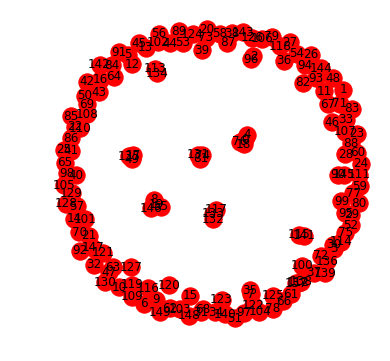

time: 362 ms


In [5]:
G = GirvanNewman(g)
c = G.split()
ax = G.plot()
plt.show()